# Introduction
On this [Link](https://datastudio.google.com/reporting/9814ff49-4182-4809-bb0e-aea46f742882) we can find a report on Google Data Studio

All [data](https://www.kaggle.com/yamqwe/2018-w51-london-bus-safety-performancee) from Kaggle.com

In [1]:
import pandas as pd
raw = pd.read_csv('./data/TFL Bus Safety.csv')
raw

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23155,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult
23156,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult


In [2]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       23158 non-null  int64 
 1   Date Of Incident           23158 non-null  object
 2   Route                      23158 non-null  object
 3   Operator                   23158 non-null  object
 4   Group Name                 23158 non-null  object
 5   Bus Garage                 23158 non-null  object
 6   Borough                    23158 non-null  object
 7   Injury Result Description  23158 non-null  object
 8   Incident Event Type        23158 non-null  object
 9   Victim Category            23158 non-null  object
 10  Victims Sex                23158 non-null  object
 11  Victims Age                23158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


In [3]:
categorical = raw.dtypes[raw.dtypes == 'object'].index
categorical

Index(['Date Of Incident', 'Route', 'Operator', 'Group Name', 'Bus Garage',
       'Borough', 'Injury Result Description', 'Incident Event Type',
       'Victim Category', 'Victims Sex', 'Victims Age'],
      dtype='object')

In [4]:
raw[categorical].describe()

,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
count,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158
unique,45,612,25,14,84,35,4,10,17,3,5
top,2017-07-01,OOS,Metroline,Arriva London,Garage Not Available,Westminster,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
freq,650,321,3457,4945,8572,1571,17336,6981,18828,11847,10754


In [5]:
raw.dtypes

Year                          int64
Date Of Incident             object
Route                        object
Operator                     object
Group Name                   object
Bus Garage                   object
Borough                      object
Injury Result Description    object
Incident Event Type          object
Victim Category              object
Victims Sex                  object
Victims Age                  object
dtype: object

In [6]:
raw.groupby(raw['Victims Sex']).count()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Age
Victims Sex,,,,,,,,,,,
Female,11847,11847,11847,11847,11847,11847,11847,11847,11847,11847,11847
Male,7709,7709,7709,7709,7709,7709,7709,7709,7709,7709,7709
Unknown,3602,3602,3602,3602,3602,3602,3602,3602,3602,3602,3602


In [7]:
raw['Victims Sex'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [8]:
raw['Victims Sex'].value_counts()

Female     11847
Male        7709
Unknown     3602
Name: Victims Sex, dtype: int64

In [9]:
a = raw.groupby('Year')['Victims Sex'].value_counts()
a

Year  Victims Sex
2015  Female         2259
      Unknown        1839
      Male           1617
2016  Female         3327
      Male           2106
      Unknown         660
2017  Female         3598
      Male           2363
      Unknown         612
2018  Female         2663
      Male           1623
      Unknown         491
Name: Victims Sex, dtype: int64

Text(0.5, 1.0, 'Bus Garage')

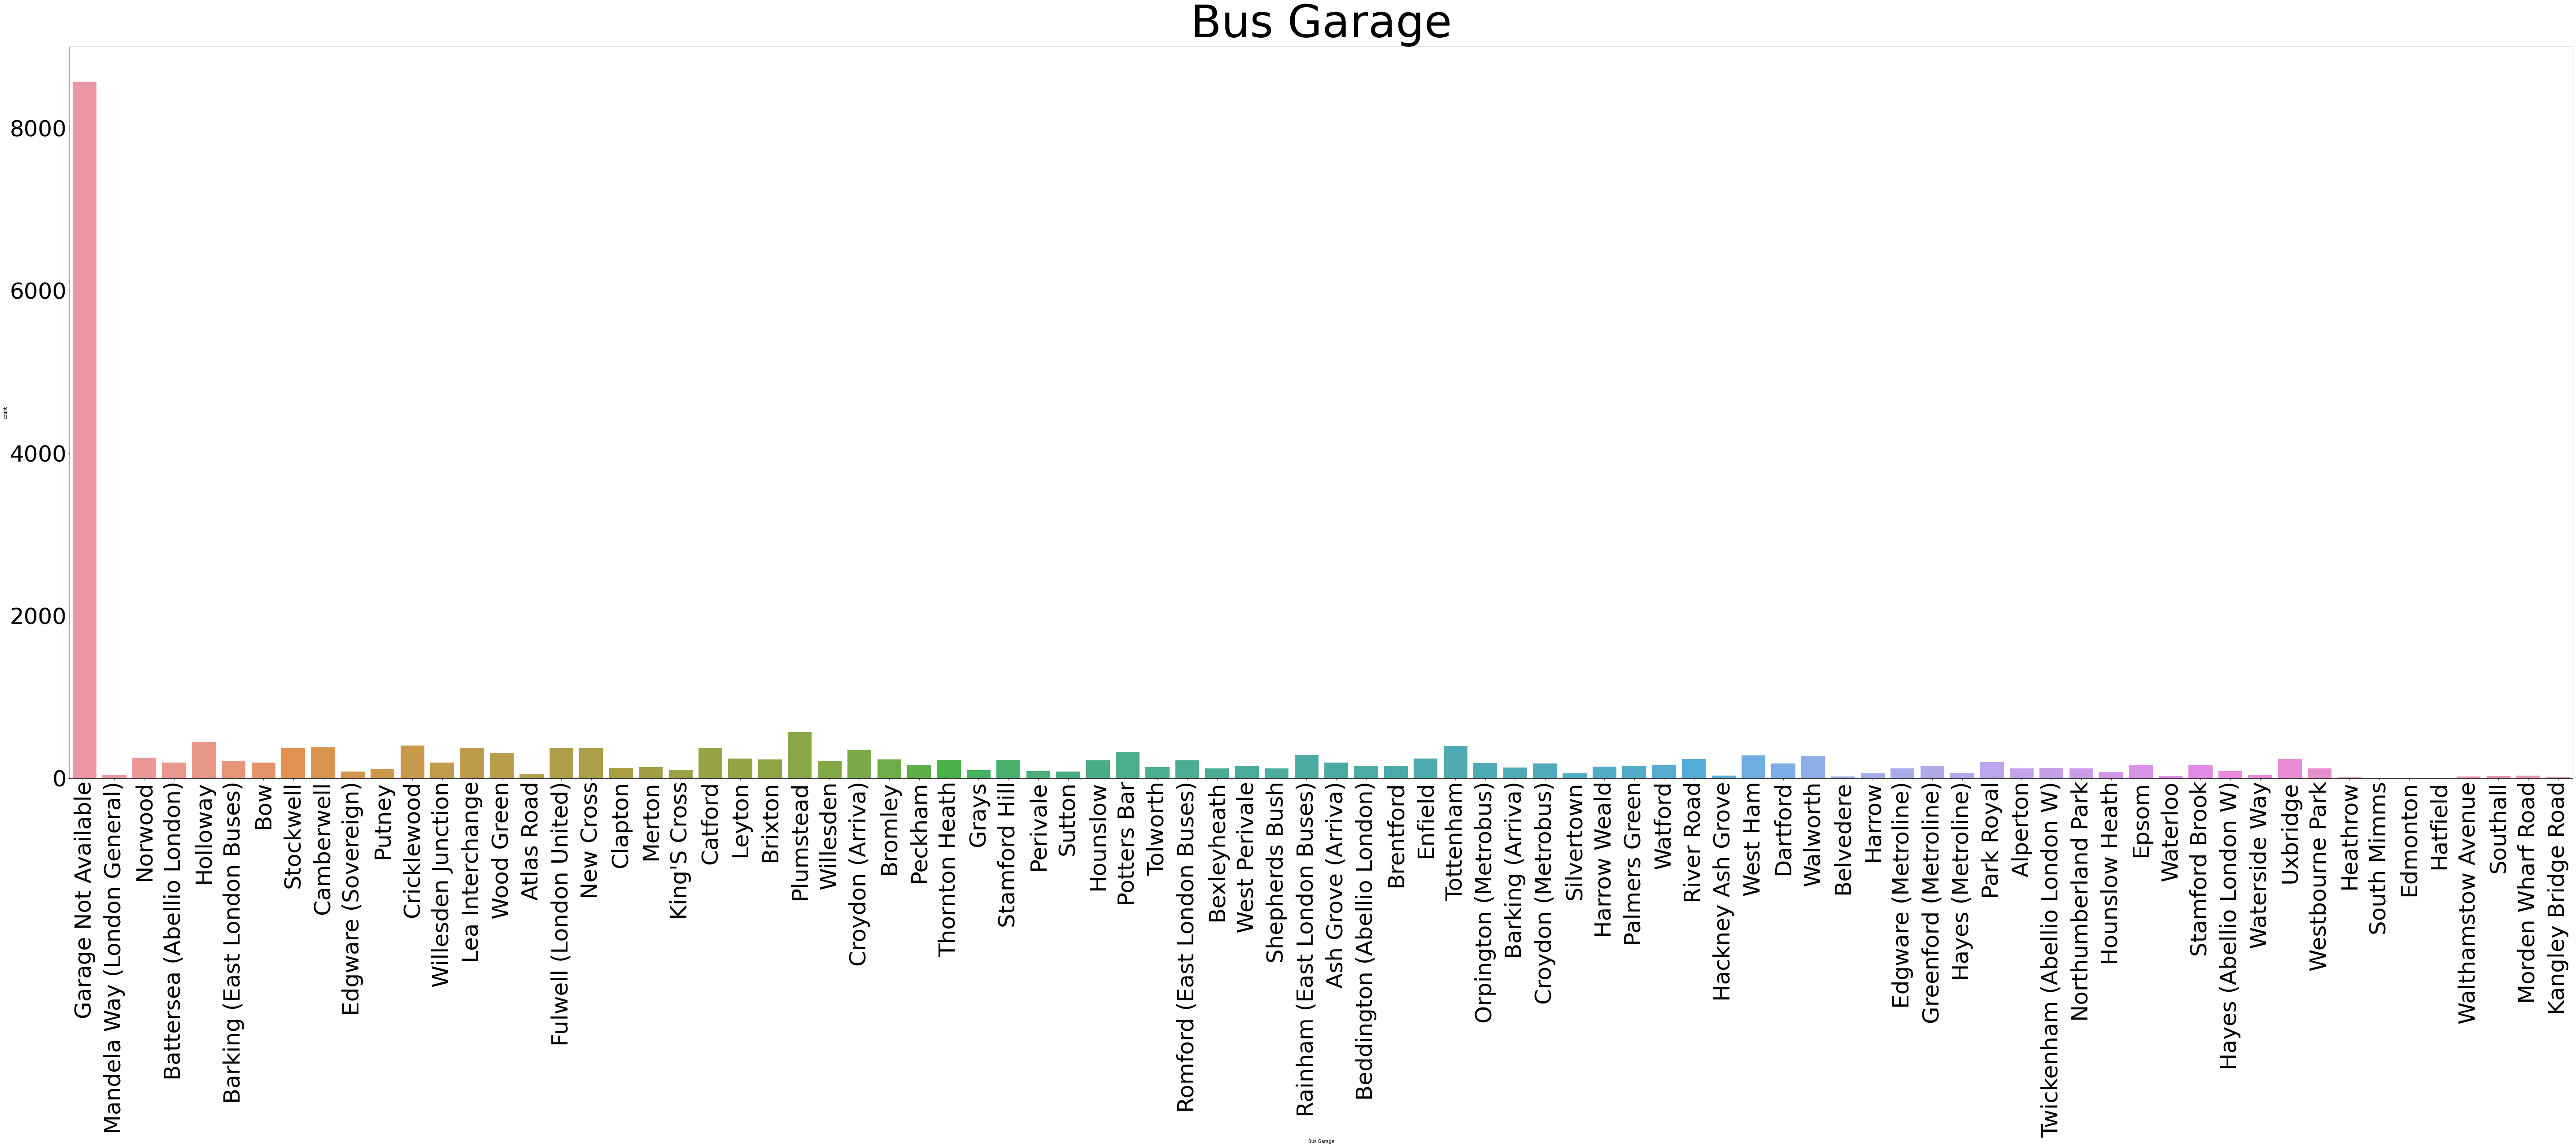

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, x= plt.subplots(figsize=(100,30))
sns.countplot(data=raw, x='Bus Garage')
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(fontsize=50)
plt.title('Bus Garage', fontsize = 100)

Text(0.5, 1.0, 'Victims Sex')

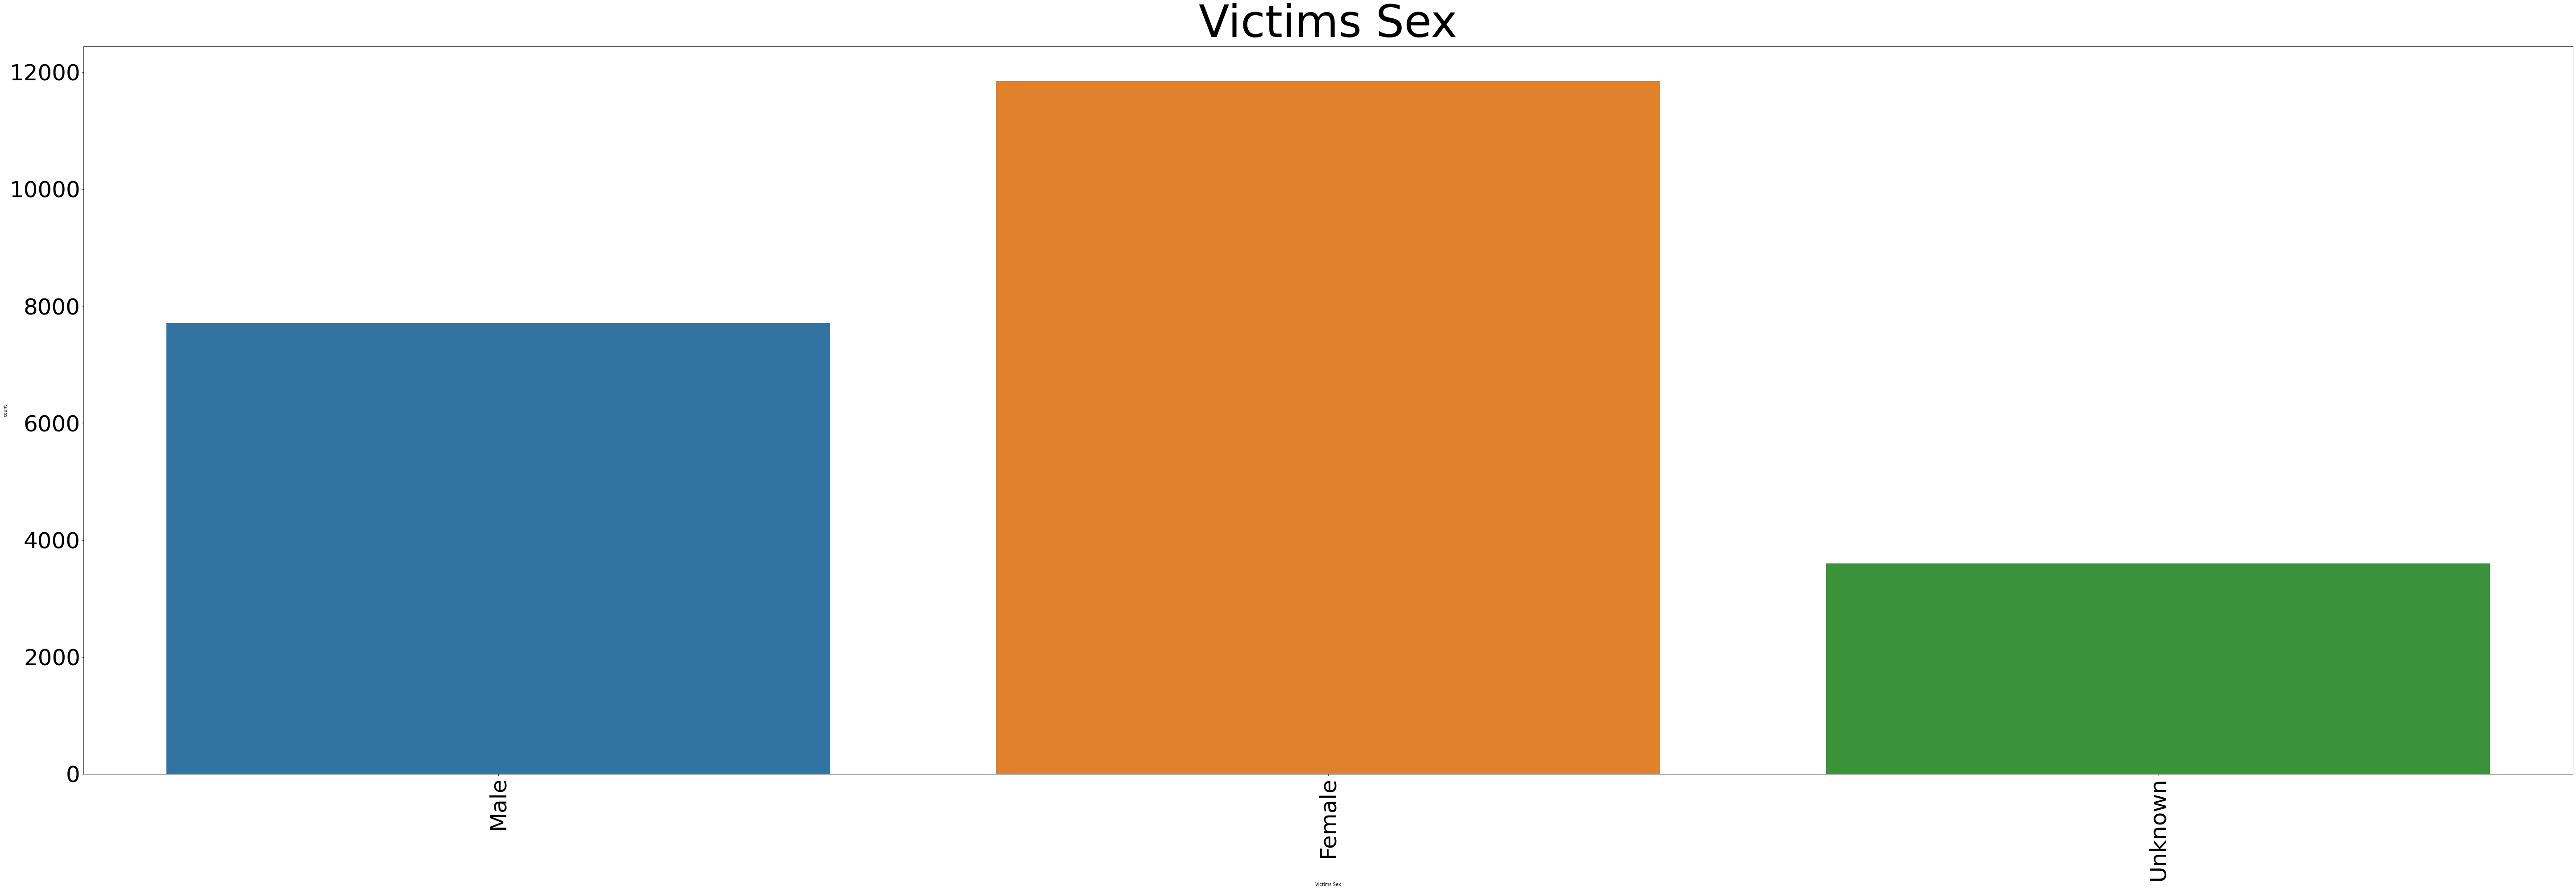

In [11]:
fig, x= plt.subplots(figsize=(100,30))
sns.countplot(data=raw, x='Victims Sex')
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(fontsize=50)
plt.title('Victims Sex', fontsize = 100)

In [12]:
# fig, ax = plt.subplots()
# a = raw.groupby('Year')['Victims Sex'].value_counts()
# group_names = raw['Victims Sex'].unique()
# group_data = a[:3]
# group_mean = a[:3].mean()

# ax.margins()
# # Add a vertical line, here we set the style in the function call
# ax.axvline(group_mean, ls='--', color='r')

# ax.set(xlabel='Numbers', ylabel='Gender', title='Victims Sex')
# ax.barh(group_names, group_data)

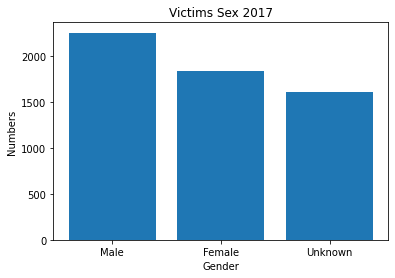

In [13]:
fig, ax = plt.subplots()
a = raw.groupby('Year')['Victims Sex'].value_counts()
# a = raw['Victims Sex'].value_counts()
x = raw['Victims Sex'].unique()
y = a[:3]
group_mean = a[3:6].mean()

ax.margins()

ax.set(xlabel='Gender', ylabel='Numbers', title='Victims Sex 2017')
ax.bar(x,y)
plt.savefig("Victims Sex 2015.png", dpi=1200)

<BarContainer object of 3 artists>

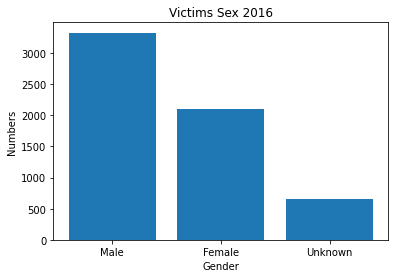

In [14]:
fig, ax = plt.subplots()
a = raw.groupby('Year')['Victims Sex'].value_counts()
# a = raw['Victims Sex'].value_counts()
x = raw['Victims Sex'].unique()
y = a[3:6]

ax.set(xlabel='Gender', ylabel='Numbers', title='Victims Sex 2016')
ax.bar(x,y)
#plt.savefig("Victims Sex 2016.png", dpi=1200)

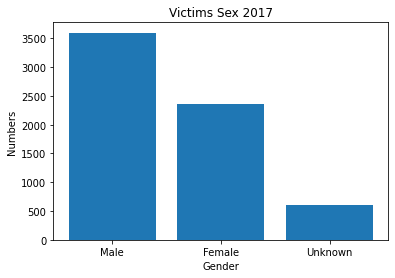

In [15]:
fig, ax = plt.subplots()
a = raw.groupby('Year')['Victims Sex'].value_counts()
# a = raw['Victims Sex'].value_counts()
x = raw['Victims Sex'].unique()
y = a[6:9]

ax.set(xlabel='Gender', ylabel='Numbers', title='Victims Sex 2017')
ax.bar(x,y)
plt.savefig("Victims Sex 2017.png", dpi=1200)

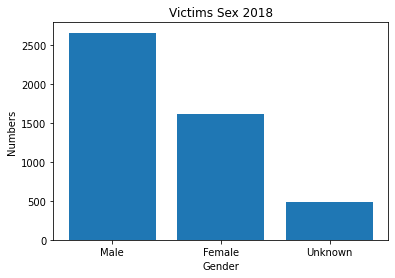

In [16]:
fig, ax = plt.subplots()
a = raw.groupby('Year')['Victims Sex'].value_counts()
# a = raw['Victims Sex'].value_counts()
x = raw['Victims Sex'].unique()
y = a[9:12]

ax.set(xlabel='Gender', ylabel='Numbers', title='Victims Sex 2018')
ax.bar(x,y)
plt.savefig("Victims Sex 2018.png", dpi=1200)

In [17]:
len(raw['Bus Garage'].unique())

84

### ValueError: shape mismatch: objects cannot be broadcast to a single shape
For resolve this problem → So when you get this error, double check your input to the plot functions and make sure they are what you meant them to be.

If they don’t have the same length, matplotlib can’t figure out how to plot it.

In [18]:
raw.groupby('Year')['Victim Category'].value_counts()

Year  Victim Category            
2015  Passenger                      4608
      Pedestrian                      451
      Bus Driver                      356
      3rd Party driver / Occupant     133
      Cyclist                          66
      Member Of Public                 26
      Motorcyclist                     26
      Operational Staff                25
      Conductor                        14
      Other                             5
      Non-Operational Staff             4
      Contractor Staff                  1
2016  Passenger                      4839
      Pedestrian                      474
      Bus Driver                      414
      3rd Party driver / Occupant     175
      Cyclist                          64
      Member Of Public                 35
      Cyclist                          33
      Motorcyclist                     23
      Conductor                        13
      Operational Staff                11
      Motorcyclist                      4


Text(0.5, 1.0, 'Victim Category')

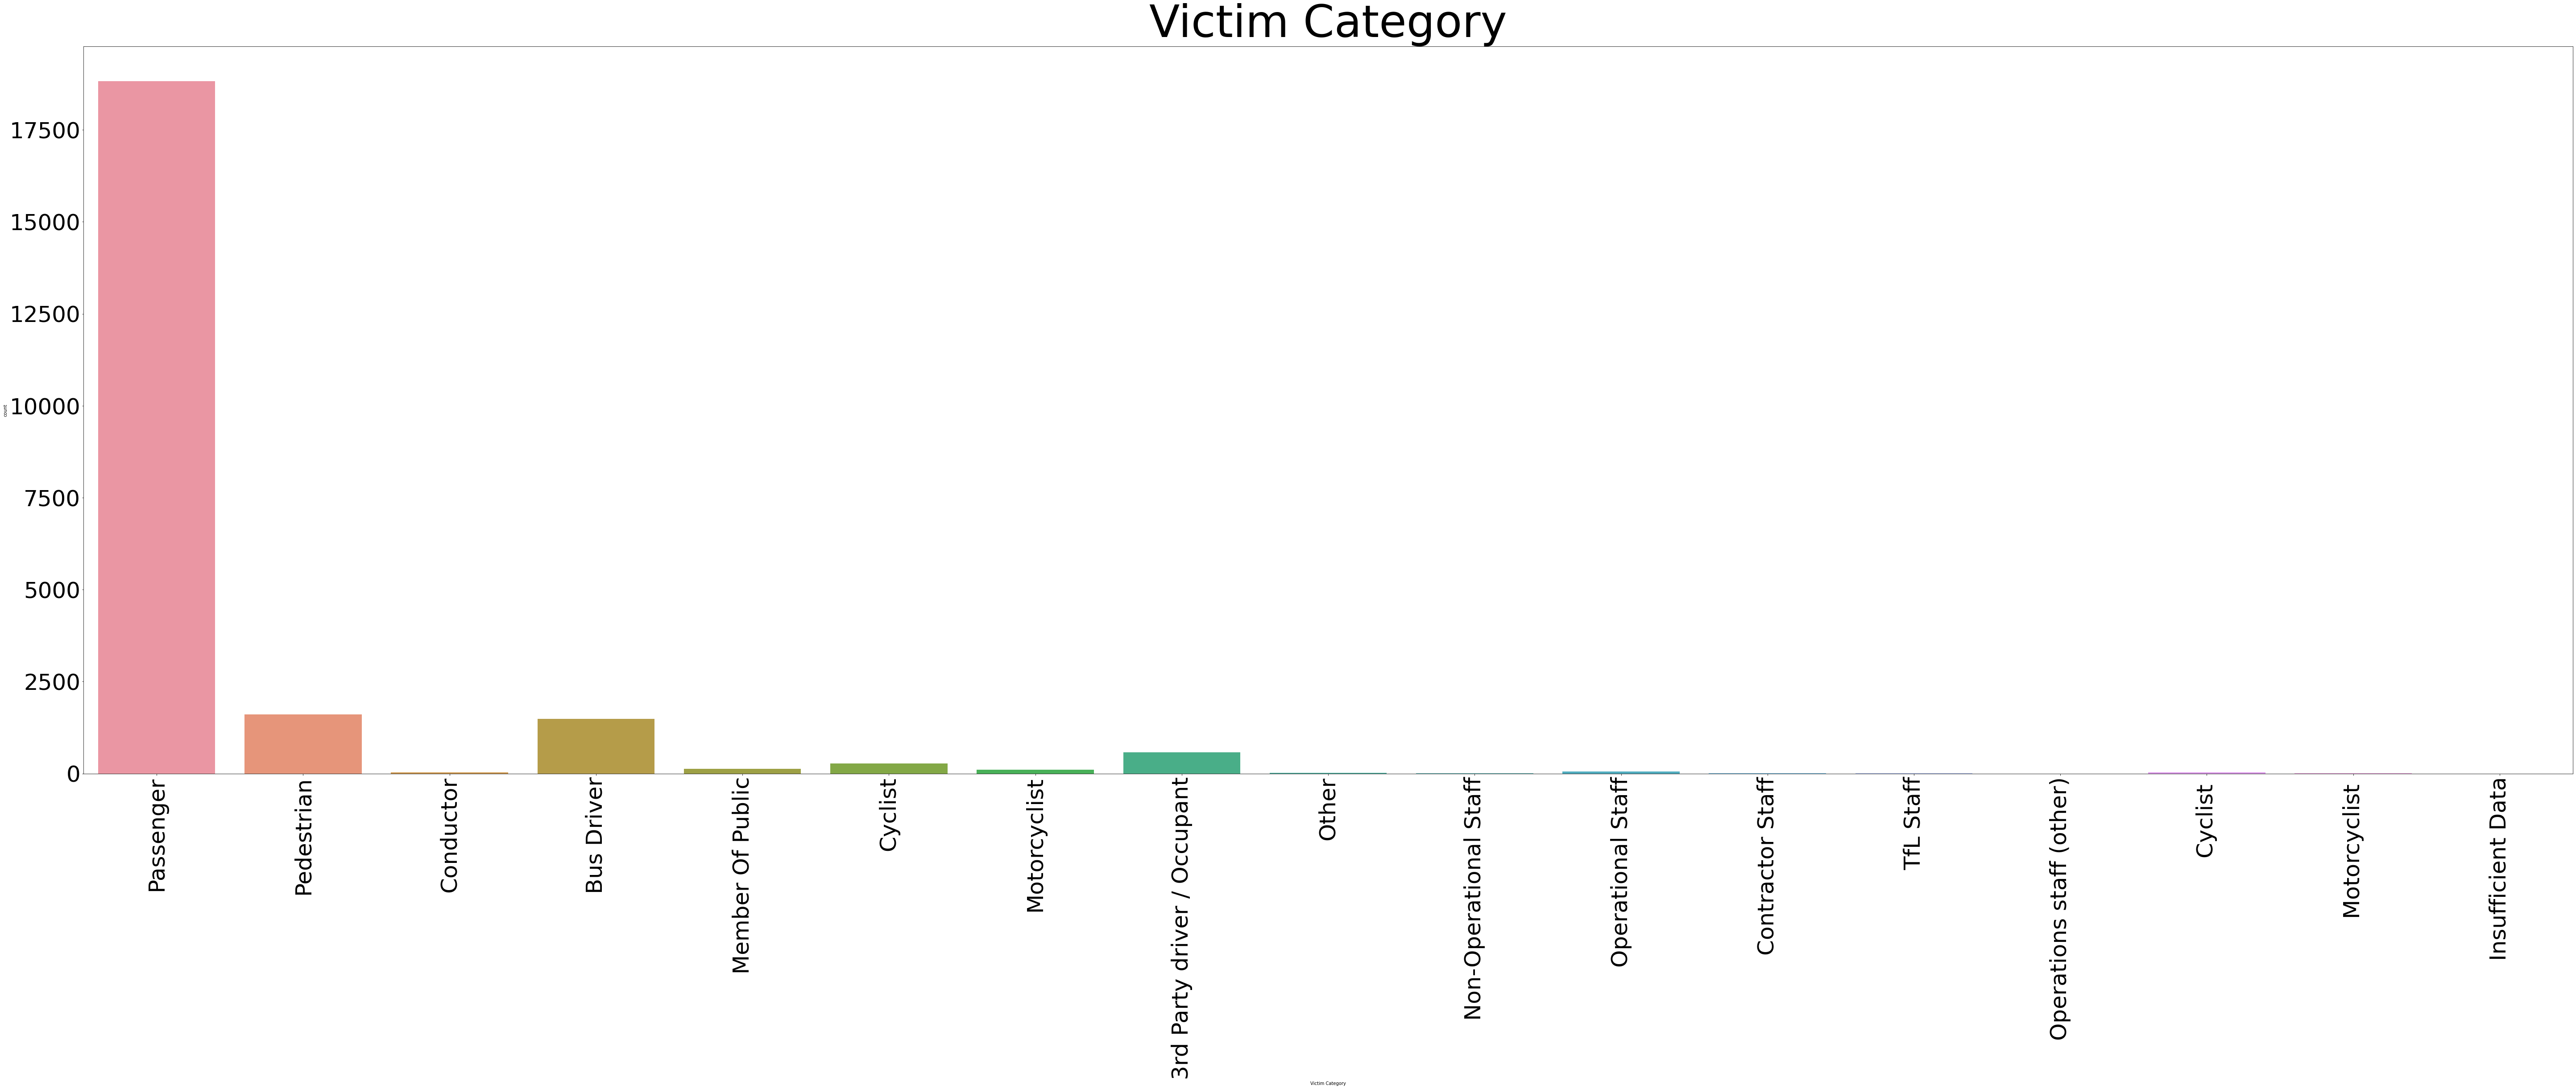

In [19]:
fig, x= plt.subplots(figsize=(100,30))
sns.countplot(data=raw, x='Victim Category')
plt.xticks( rotation=90, fontsize = 50)
plt.yticks(fontsize=50)
plt.title('Victim Category', fontsize = 100)

Year
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Victims Sex, dtype: object

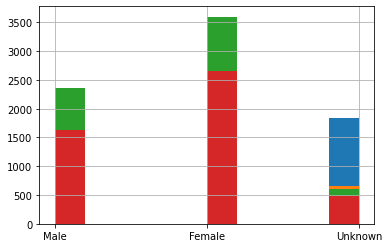

In [20]:
raw.groupby('Year')['Victims Sex'].hist()

In [21]:
raw['Victims Age'].unique()

array(['Child', 'Unknown', 'Elderly', 'Adult', 'Youth'], dtype=object)

In [22]:
raw['Victims Age'].value_counts()

Adult      10754
Unknown     7135
Elderly     2769
Child       2181
Youth        319
Name: Victims Age, dtype: int64

In [23]:
a = raw.groupby('Year')['Victims Age'].value_counts()

In [24]:
for x in a:
    print(x)

2418
2176
617
427
77
2839
1888
725
562
79
3233
1738
838
665
99
2264
1333
589
527
64


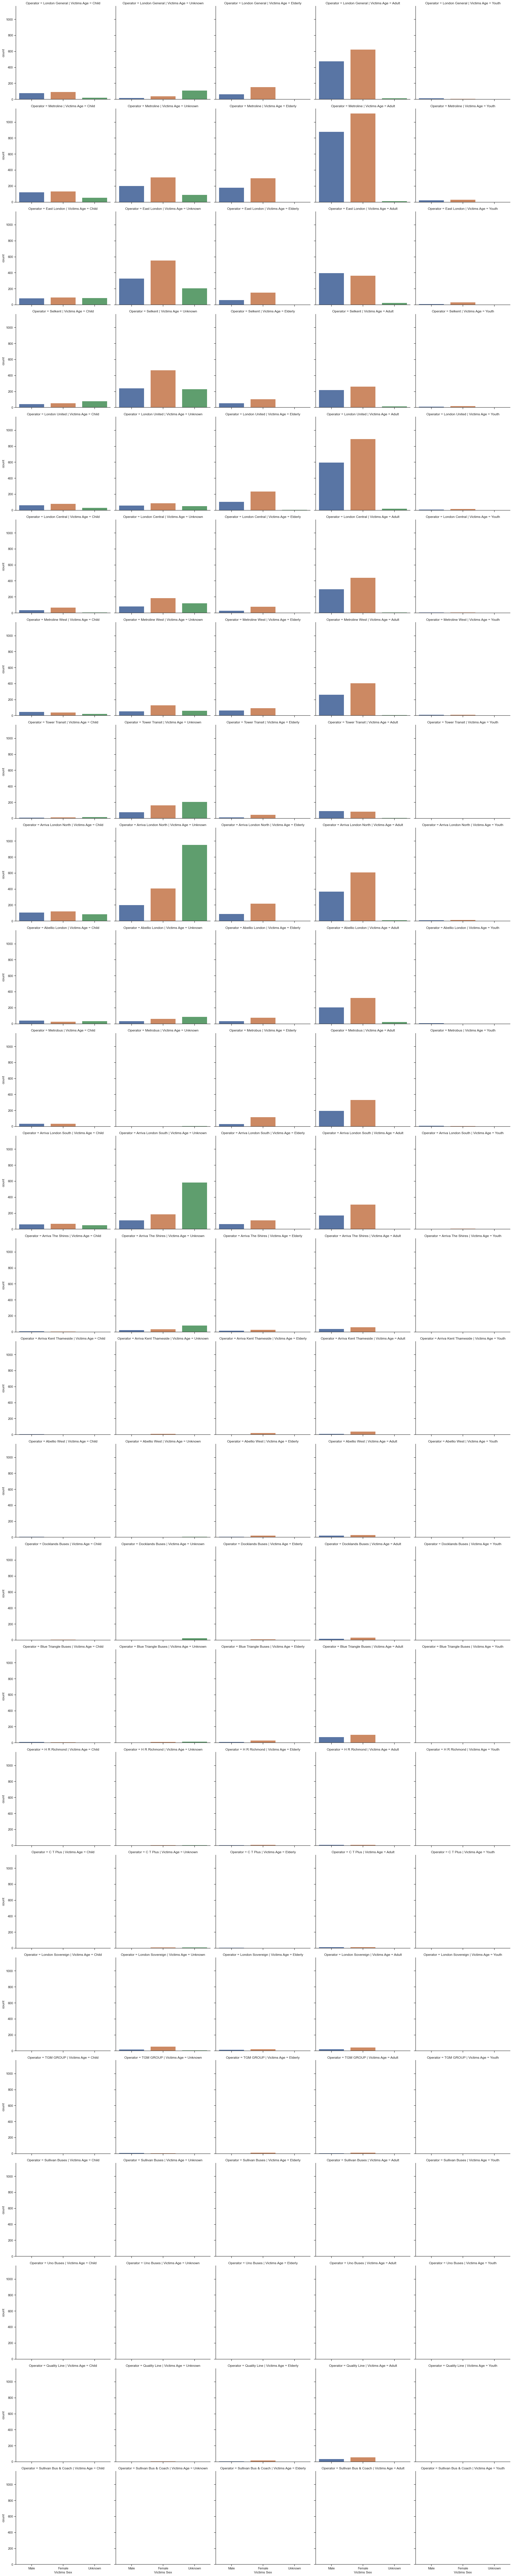

In [25]:
import seaborn as sns
  
sns.set_theme(style="ticks")
  
g = sns.catplot(x="Victims Sex",
                kind="count",
                col="Victims Age",
                row='Operator',
                data=raw)

# plt.savefig("./Unknown.png", dpi=500)

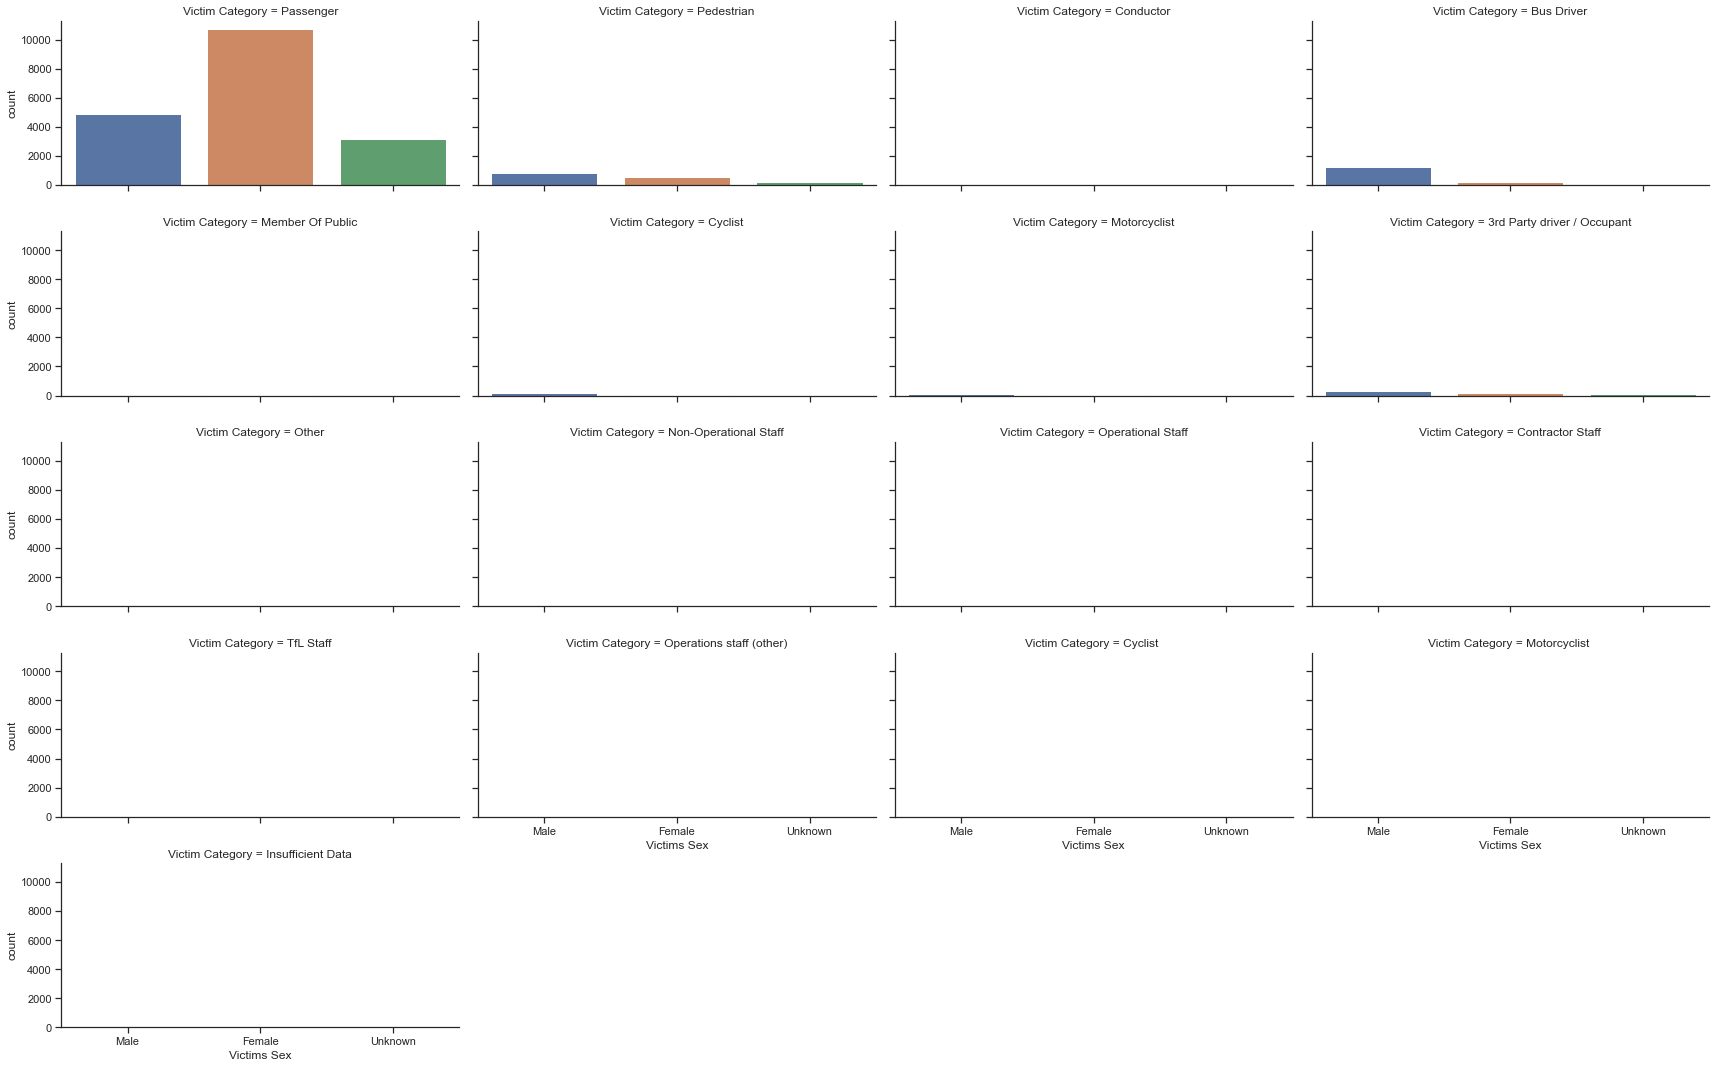

In [26]:
import seaborn as sns
  
sns.set_theme(style="ticks")
  
g = sns.catplot(x="Victims Sex",
                kind="count",
                col="Victim Category",
                col_wrap=4, height=3, aspect=2,
                data=raw)

# plt.savefig("Victims Category Corr to Sex.png", dpi=1200)

Text(37.46344548611113, 0.5, 'Count')

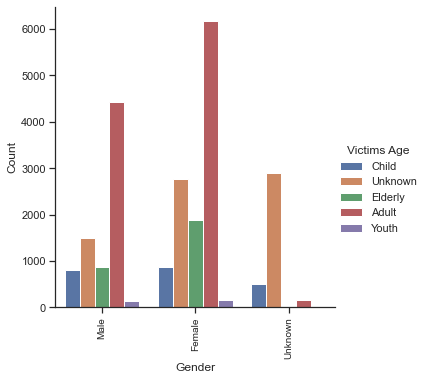

In [27]:
# Grouped Countplot/Barplot
# Count of passengers who survived
# or didn't of each gender
sns.catplot(x='Victims Sex', hue='Victims Age',
            kind='count', data=raw)
  
plt.xlabel("Gender")
plt.xticks(rotation=90, fontsize = 10)
plt.ylabel("Count")

Text(37.46344548611113, 0.5, 'Count')

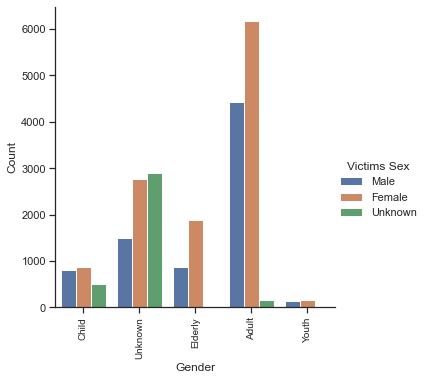

In [28]:
# Grouped Countplot/Barplot
# Count of passengers who survived
# or didn't of each gender
sns.catplot(x='Victims Age', hue='Victims Sex',
            kind='count', data=raw)
  
plt.xlabel("Gender")
plt.xticks(rotation=90, fontsize = 10)
plt.ylabel("Count")

## Overall Graph

### Victims Age
In order of frequenty we can find:
1. Adult
2. Unknown
3. Elderly
4. Child
5. Youth

[Text(0.5, 0, 'AGE'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Victims Age Overall')]

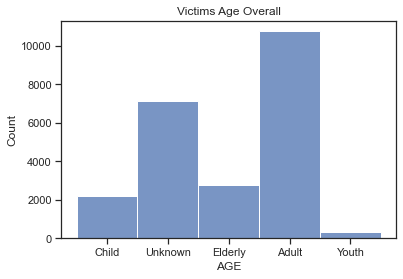

In [29]:
ax = sns.histplot(data=raw, x='Victims Age')
ax.set(xlabel='AGE', ylabel='Count', title='Victims Age Overall')
# plt.savefig("Victims Age Overall.png", dpi=1200)

### Victims Sex
In order of frequenty we can find:
1. Female
2. Male
3. Unknown

[Text(0.5, 0, 'SEX'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Victims Sex Overall')]

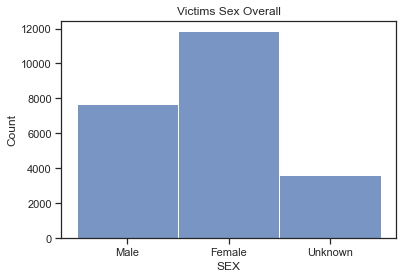

In [30]:
ax = sns.histplot(data=raw, x='Victims Sex')
ax.set(xlabel='SEX', ylabel='Count', title='Victims Sex Overall')
# plt.savefig("Victims Sex Overall.png", dpi=1200)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

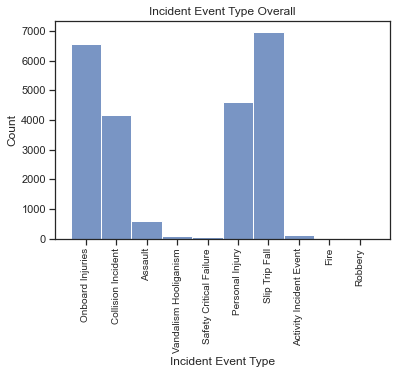

In [31]:
ax = sns.histplot(data=raw, x='Incident Event Type')
ax.set(xlabel='Incident Event Type', ylabel='Count', title='Incident Event Type Overall')
plt.xticks(rotation=90, fontsize = 10)
# plt.savefig("Victims Sex Overall.png", dpi=1200)


In [32]:
int_gender_freq = pd.crosstab(index=raw['Victims Age'], 
                              columns=raw['Victims Sex'])
int_gender_freq

Victims Sex,Female,Male,Unknown
Victims Age,,,
Adult,6168,4427,159
Child,873,796,512
Elderly,1879,866,24
Unknown,2757,1487,2891
Youth,170,133,16


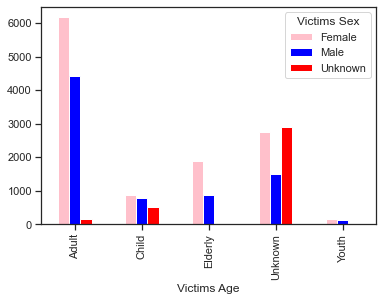

In [33]:
_ = int_gender_freq.plot.bar(color=['pink', 'blue', 'red'])

In [34]:
g = int_gender_freq.loc[:,['Male', 'Female', 'Unknown']]
g

Victims Sex,Male,Female,Unknown
Victims Age,,,
Adult,4427,6168,159
Child,796,873,512
Elderly,866,1879,24
Unknown,1487,2757,2891
Youth,133,170,16


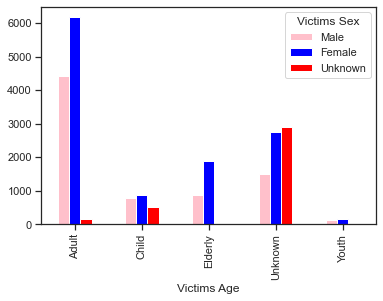

In [35]:
_ = g.plot.bar(color=['pink', 'blue', 'red'])

In [36]:
int_gender_freq.loc['Victims Sex':'Victims Age', :]

Victims Sex,Female,Male,Unknown
Victims Age,,,
